# Explore here

In [2]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df = df.drop_duplicates().reset_index(drop=True)

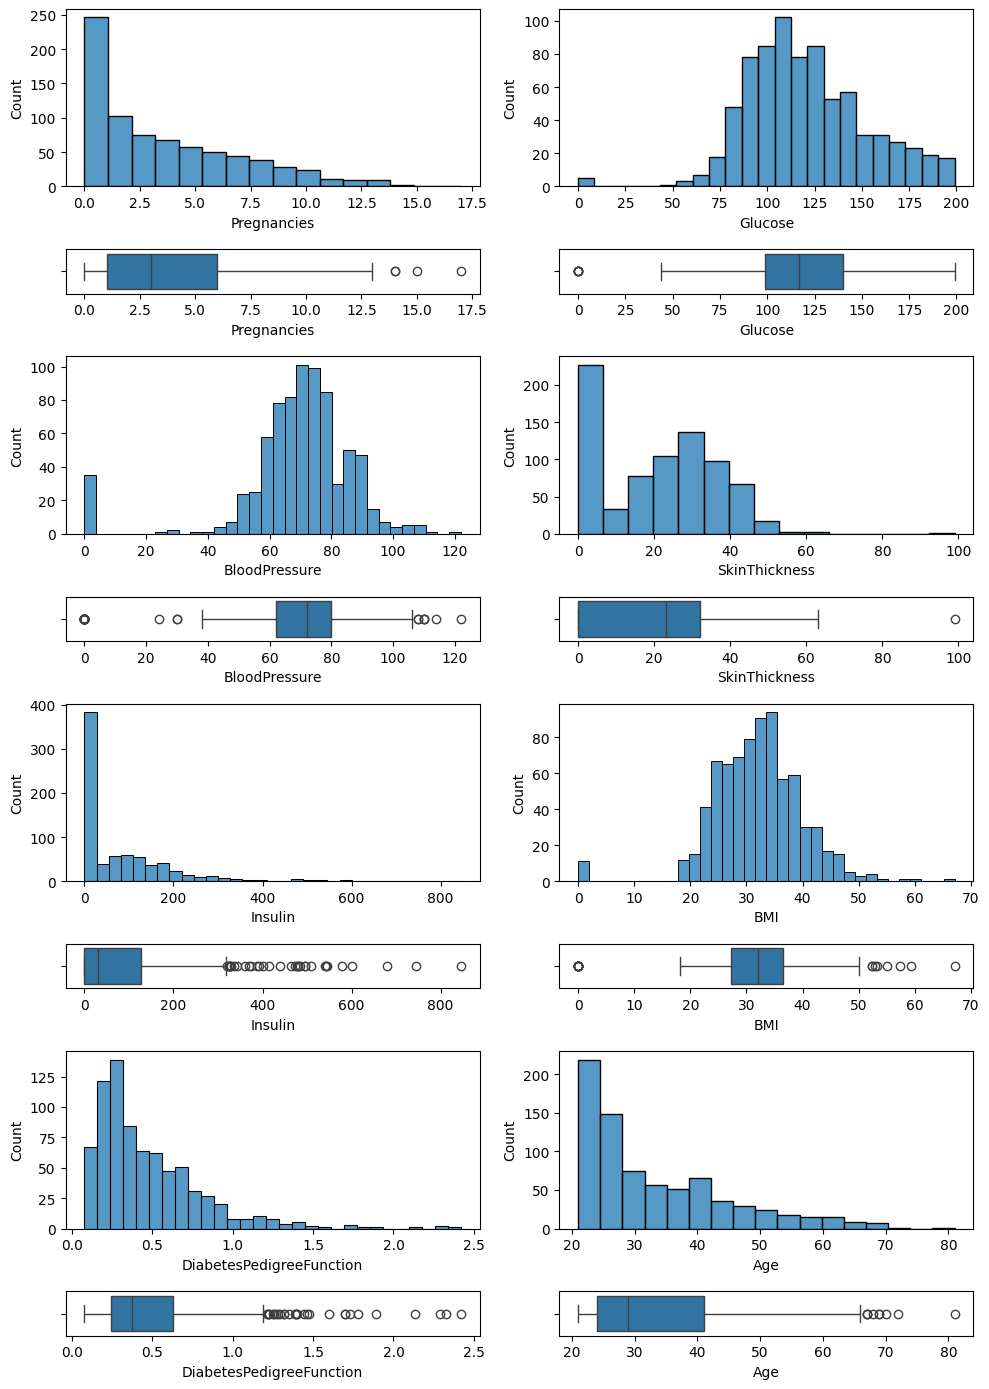

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(8, 2, figsize = (10, 14), gridspec_kw={'height_ratios': [4, 1]*4})

sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose")
sns.histplot(ax = axis[2, 0], data = df, x = "BloodPressure")
sns.boxplot(ax = axis[3, 0], data = df, x = "BloodPressure")
sns.histplot(ax = axis[2, 1], data = df, x = "SkinThickness")
sns.boxplot(ax = axis[3, 1], data = df, x = "SkinThickness")
sns.histplot(ax = axis[4, 0], data = df, x = "Insulin")
sns.boxplot(ax = axis[5, 0], data = df, x = "Insulin")
sns.histplot(ax = axis[4, 1], data = df, x = "BMI")
sns.boxplot(ax = axis[5, 1], data = df, x = "BMI")
sns.histplot(ax = axis[6, 0], data = df, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[7, 0], data = df, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[6, 1], data = df, x = "Age")
sns.boxplot(ax = axis[7, 1], data = df, x = "Age")


plt.tight_layout()

plt.show()

In [5]:
df = df[df['BloodPressure'] > 0]
df = df[df['Glucose'] > 0]
df = df[df['BMI'] > 0]
df = df[df['SkinThickness'] < 90]

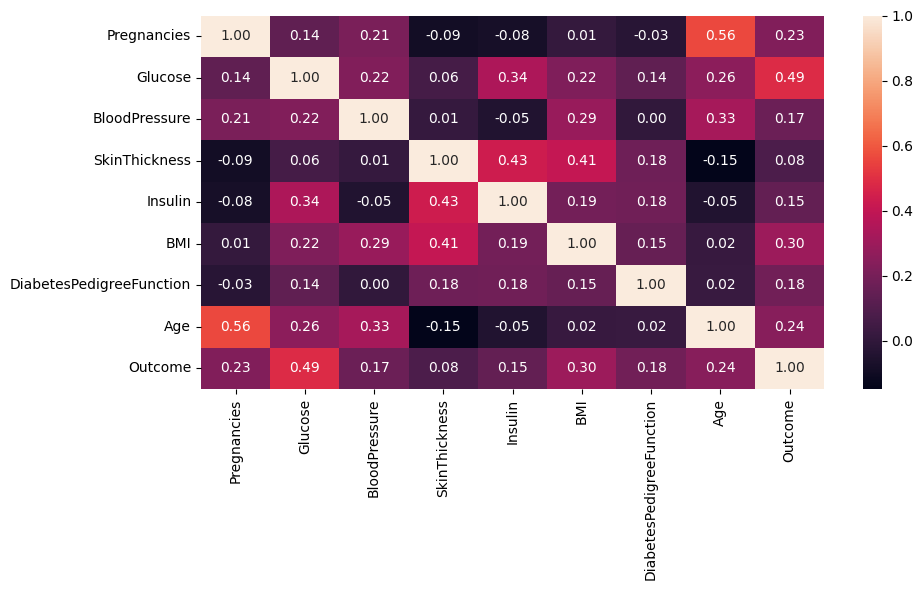

In [6]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

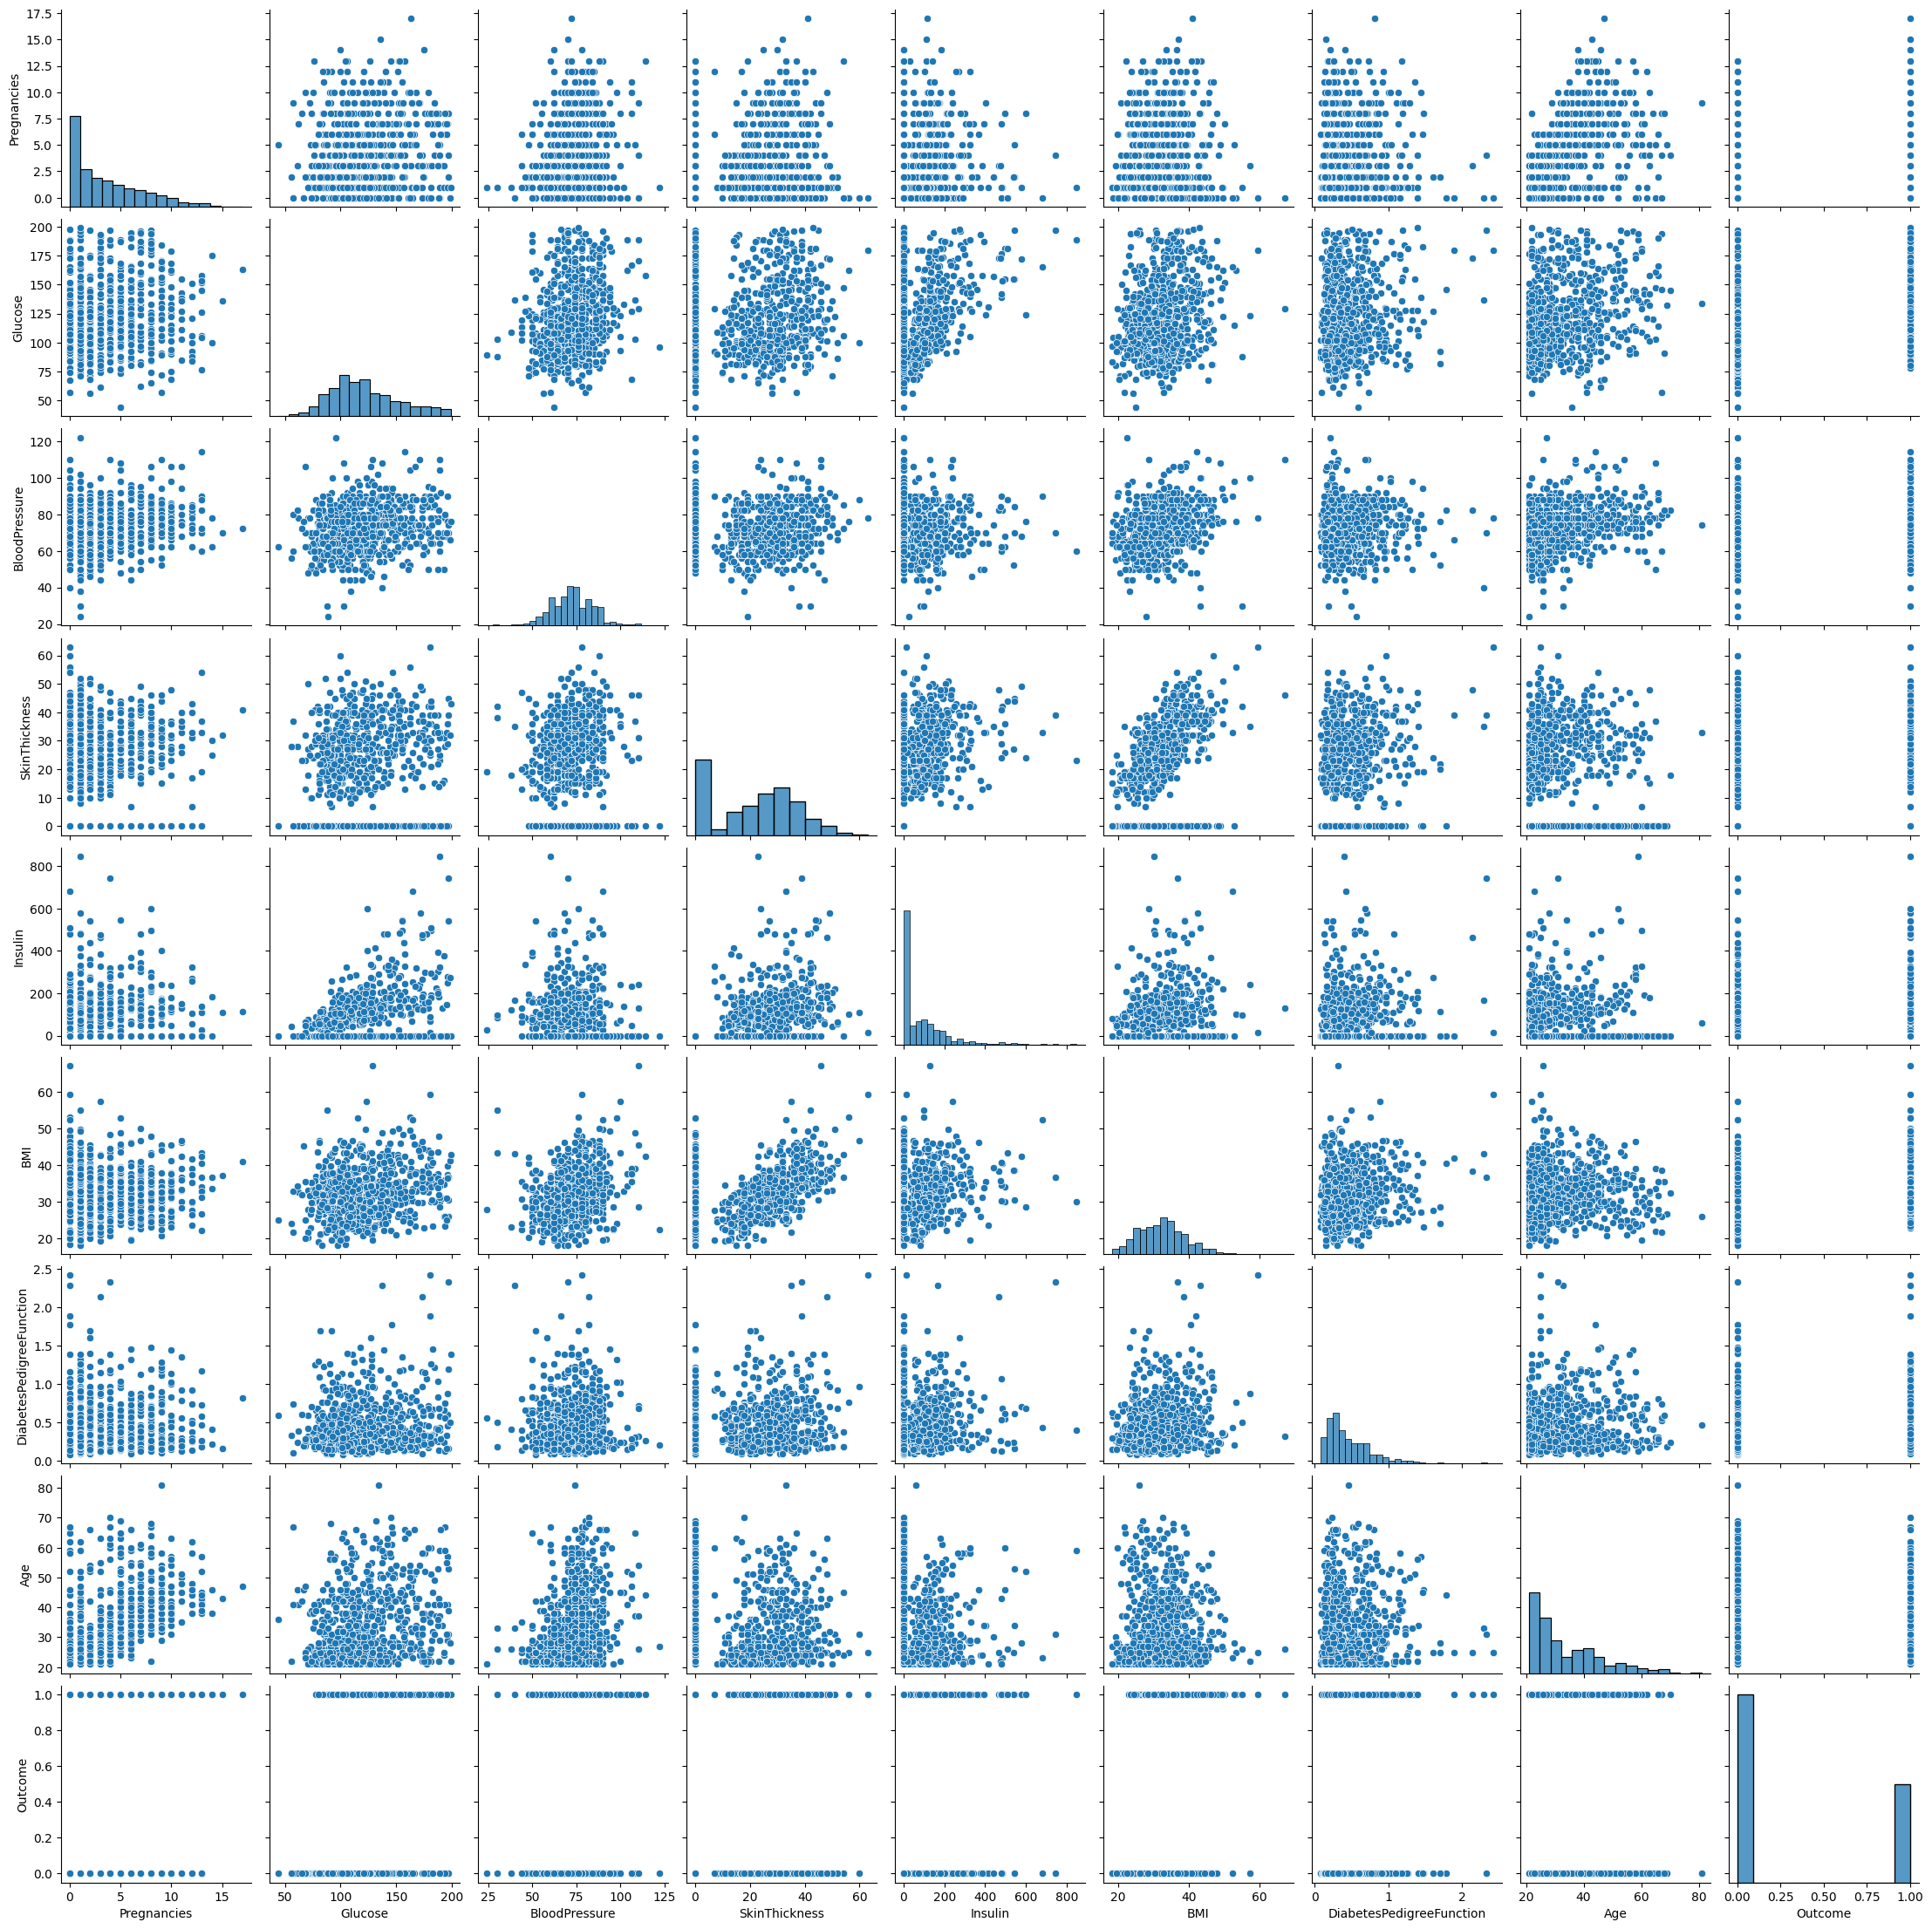

In [7]:
sns.pairplot(data = df)

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7379310344827587


In [12]:
#pendiente la grilla 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()

hyperparametros = {
    'n_estimators': [100, 200, 300, 400, 500], 
    'max_depth': [1, 3, 5, 10],
    'learning_rate': [0.3, 0.1, 0.01, 0.05]
}


grid = GridSearchCV(estimator=model, param_grid=hyperparametros, cv=5, n_jobs=1)

In [13]:
grid.fit(X_train,y_train)

print(f'Mejores parametros:  {grid.best_params_}')

Mejores parametros:  {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 200}


In [14]:
#obtener mejor modelo
best_model = XGBClassifier(n_estimators = 200, max_depth = 1 , learning_rate = 0.05)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7655172413793103

In [15]:
best_model.save_model('model.json')